# **Basic Info**

1. We aggregated screen movements into screen-fixations using a Salvucci & Goldberg (2000) dispersion-threshold algorithm, and defined Perception Action Cycles (PACs) as fixations with at least one action.
Time is recorded in terms of timestamps in the StarCraft 2 replay file. When the game is played on 'faster', 1 real-time second is equivalent to roughly 88.5 timestamps.
List of possible game actions is discussed in Thompson, Blair, Chen, & Henrey (2013)

 * GameID: Unique ID number for each game (integer)
 * LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master,  GrandMaster, and Professional leagues coded 1-8 (Ordinal)
 * Age: Age of each player (integer)
 * HoursPerWeek: Reported hours spent playing per week (integer)
 * TotalHours: Reported total hours spent playing (integer)
 * APM: Action per minute (continuous)
 * SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)
 * AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)
 * UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)
 * MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)
 * MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)
 * NumberOfPACs: Number of PACs per timestamp (continuous)
 * GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)
 * ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)
 * ActionsInPAC: Mean number of actions within each PAC (continuous)
 * TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)
 * WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)
 * UniqueUnitsMade: Unique unites made per timestamp (continuous)
 * ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)
 * ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)

 

2. Running the data.info () function we find that the number of samples is 3396 and the number of attributes is 20. There are no ordered values. Running the data.dtypes function we see that the attributes of the whole dataset are real numbers


3. No, running the data.head () function we can see that there is no numbering in the lines and there are headings


4. The 2nd column is the target

5. We converted the file from .data to .xlsx in order to load the dataset in the notebook


6. Running the  data.isnull().values.any() function we can see that there are missing values ​​in the dataset

In [ ]:
!pip install  pip 
!pip install scikit-learn 
!pip install numpy 
!pip install pandas 
!pip install scikit-learn
!pip install imblearn

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import median_absolute_error as mae
import time

#load time matrixes

times_train_bef = {} 

times_test_bef = {}

times_train_aft = {}

times_test_aft = {}

#missing values
missing_values = ["n/a", "na", "?"]

#load dataset
data = pd.read_excel('B01.xlsx',na_values = missing_values)

print(data)

      GameID  LeagueIndex  ...  ComplexUnitsMade  ComplexAbilitiesUsed
0         52            5  ...          0.000000              0.000000
1         55            5  ...          0.000000              0.000208
2         56            4  ...          0.000000              0.000189
3         57            3  ...          0.000000              0.000384
4         58            3  ...          0.000000              0.000019
...      ...          ...  ...               ...                   ...
3390   10089            8  ...          0.000000              0.000000
3391   10090            8  ...          0.000000              0.000000
3392   10092            8  ...          0.000000              0.000000
3393   10094            8  ...          0.000000              0.000631
3394   10095            8  ...          0.000457              0.000895

[3395 rows x 20 columns]


# **Checking for missing values**


In [ ]:
data.isnull().values.any()

True

## **Fixing missing values**

In order to continue the analysis of the dataset we replace the missing values with the median of every column.

In [ ]:
print(data.isnull().sum()) # amount of missing values

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64


In [ ]:
# Replace using median 
median = data['Age'].median()
data['Age'].fillna(median, inplace=True)

median = data['HoursPerWeek'].median()
data['HoursPerWeek'].fillna(median, inplace=True)

median = data['TotalHours'].median()
data['TotalHours'].fillna(median, inplace=True)

#**GameID Drop Explanation**

Understanding the entire dataset and the importance of each column, we consider it appropriate to "remove" the GameID column because it is obvious that it is not connected at all to the column we want to predict . In fact, our opinion is reinforced by the fact that in Google Scholar sum: does not take into account for the study of the dataset this column

In [ ]:
column_1 = data["LeagueIndex"]

column_2 = data["GameID"]

correlation = column_1.corr(column_2)

print(correlation)

0.1026009539158643


# **Train-Test Split**

In [ ]:
X = data.drop(columns=['LeagueIndex','GameID']) #we keep all the other columns except from League Index,GameID
y = data.iloc[:,1] #predicted value League Index

In [ ]:
# Train-Test Split: 33% of our dataset->test data and the rest-> train data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

# **Baseline Regressors**


**Generally Info for Regressors:**

*  **Ridge Regressor**:Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares.

*   **Lasso Regressor**: Linear Model trained with L1 prior as regularizer (aka the Lasso). Technically the Lasso model is optimizing the same objective function with l1_ratio=1.0 (no L2 penalty). 
* **Polynomial Regressor**: Generate polynomial and interaction features.Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 
* **Support Vector Machine Regressor**: Epsilon-Support Vector Regression. The free parameters in the model are C and epsilon.
The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples.
*   **Decision Tree Regressor**: Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
* **Extra Tree Regressor**: An extra-trees regressor. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
* **Gradient Boosting Regressor**: GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.


**Generally Info for Accuracy Metrics:**

* **Mean Squared Error**: measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. 
* **R-squared**:  is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The coefficient of determination normally ranges from 0 to 1. For instance, an R-squared equals to 1 means that all movements of dependent variable are completely explained by movements of independent variable(s). R-squared is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.
* **Mean absolute error**: is a measure of errors between paired observations expressing the same phenomenon.

## **Ridge Regressor**

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge()

start_time = time.time()

rr.fit(x_train, y_train)

times_train_bef['rr'] = time.time() - start_time

start_time = time.time()

rr_preds = rr.predict(x_test)

times_test_bef['rr'] = time.time() - start_time

rr_mse_score = mse(y_test, rr_preds)

rr_r2_score = r2(y_test, rr_preds)

rr_mae_score = mae(y_test, rr_preds)

## **Lasso Regressor**

In [ ]:
from sklearn import linear_model

lr = linear_model.Lasso()

start_time = time.time()

lr.fit(x_train, y_train)

times_train_bef['lr'] = time.time() - start_time

start_time = time.time()

lr_preds = lr.predict(x_test)

times_test_bef['rr'] = time.time() - start_time

lr_mse_score = mse(y_test, lr_preds)

lr_r2_score = r2(y_test, lr_preds)

lr_mae_score = mae(y_test, lr_preds)



## **Elastic Net Regressor**




In [ ]:
from sklearn.linear_model import ElasticNet

enr = ElasticNet()

start_time = time.time()

enr.fit(x_train, y_train)

times_train_bef['enr'] = time.time() - start_time

start_time = time.time()

enr_preds = enr.predict(x_test)

times_test_bef['enr'] = time.time() - start_time

enr_mse_score = mse(y_test, enr_preds)

enr_r2_score = r2(y_test, enr_preds)

enr_mae_score = mae(y_test, enr_preds)

## **Support Vector Machine Regressor**

In [ ]:
from sklearn import svm

svmr = svm.SVR()

start_time = time.time()

svmr.fit(x_train,y_train)

times_train_bef['svmr'] = time.time() - start_time

start_time = time.time()

svmr_preds = svmr.predict(x_test)

times_test_bef['svmr'] = time.time() - start_time

svmr_mse_score = mse(y_test, svmr_preds)

svmr_r2_score = r2(y_test, svmr_preds)

svmr_mae_score = mae(y_test, svmr_preds)

## **Decision Tree Regressor**

In [ ]:
from sklearn import tree

dtr = tree.DecisionTreeRegressor()

start_time = time.time()

dtr = dtr.fit(x_train,y_train)

times_train_bef['dtr'] = time.time() - start_time

start_time = time.time()

dtr_preds = dtr.predict(x_test)

times_test_bef['dtr'] = time.time() - start_time

dtr_mse_score = mse(y_test, dtr_preds)

dtr_r2_score = r2(y_test, dtr_preds)

dtr_mae_score = mae(y_test, dtr_preds)

## **Extra Tree Regressor**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()

start_time = time.time()

etr.fit(x_train,y_train)

times_train_bef['etr'] = time.time() - start_time

start_time = time.time()

etr_preds = etr.predict(x_test)

times_test_bef['etr'] = time.time() - start_time

etr_mse_score = mse(y_test, etr_preds)

etr_r2_score = r2(y_test, etr_preds)

etr_mae_score = mae(y_test, etr_preds)

## **Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

start_time = time.time()

gbr.fit(x_train,y_train)

times_train_bef['gbr'] = time.time() - start_time

start_time = time.time()

gbr_preds = gbr.predict(x_test)

times_test_bef['gbr'] = time.time() - start_time

gbr_mse_score = mse(y_test, gbr_preds)

gbr_r2_score = r2(y_test, gbr_preds)

gbr_mae_score = mae(y_test, gbr_preds)

# **Bar Plot**

**Mean Squared Error**

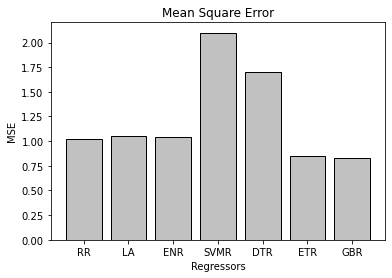

In [ ]:
# Mean Squared Error

import matplotlib.pyplot as plt 

estimators = ('RR','LA','ENR','SVMR','DTR','ETR','GBR')

mse_score1 = (rr_mse_score, lr_mse_score, enr_mse_score, svmr_mse_score,dtr_mse_score, etr_mse_score, gbr_mse_score)

plt.bar(estimators , mse_score1, color=(0.6, 0.6, 0.6, 0.6),  edgecolor='black')

plt.ylabel('MSE')

plt.xlabel('Regressors')

plt.title('Mean Square Error')

plt.show()

 **R² or Coefficient of Determination**

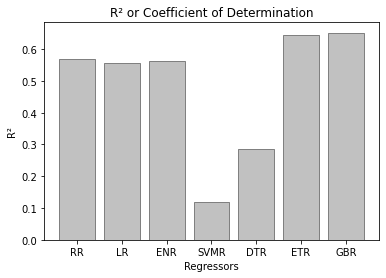

In [ ]:
# R²

import matplotlib.pyplot as plt 

estimators = ('RR','LR','ENR','SVMR','DTR','ETR','GBR')

r2_score1 = (rr_r2_score, lr_r2_score, enr_r2_score, svmr_r2_score, dtr_r2_score, etr_r2_score,gbr_r2_score)

plt.bar(estimators, r2_score1,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='grey')

plt.ylabel('R²')

plt.xlabel('Regressors')

plt.title('R² or Coefficient of Determination')

plt.show()

**Median Absolute Error**

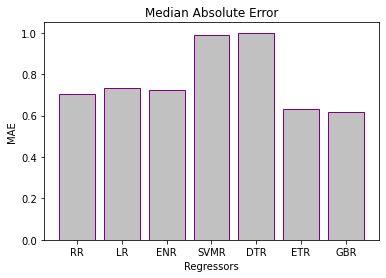

In [ ]:
# Median Absolut Error

import matplotlib.pyplot as plt 

estimators = ('RR','LR','ENR','SVMR','DTR','ETR','GBR')

mae_score1 = (rr_mae_score, lr_mae_score, enr_mae_score, svmr_mae_score, dtr_mae_score, etr_mae_score,gbr_mae_score)

plt.bar(estimators, mae_score1,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='purple')

plt.ylabel('MAE')

plt.xlabel('Regressors')

plt.title('Median Absolute Error')

plt.show()

# **Data Preprocessing**

We will then do some pre-processing of the data to improve the performance of the classifiers.


* A simple feature selection technique is the Variance threshold. In general, if the variability of an input characteristic is too low, it can not contribute significantly to the resolution of the classifier.
*   A very important parameter for the performance of the classifiers is the dimensionality of the data, especially in relation to the available number of samples. As the dimensionality increases, the available data becomes sparse. 
* By unbalanced dataset we mean a dataset in which the sample numbers of each class differ significantly from each other. Most classifiers are best trained when the samples of all classes are relatively equal.
* Features with very large differences in their absolute values ​​can cause problems in education and give classifiers with non-optimal performance. Standard score conversion is necessary for many classifiers to behave properly. It is also more resistant than the min-max to outliers, ie sporadic values ​​that are far from the average value and the rest of the feature values ​​(the min-max will compress most values ​​in a short time).




## **Variance Threshold**

We see that with threshold= 0.5, we drop a large amount of data. For this reason we will not use it in data preprocessing

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.5)

x_train_reduced = vt.fit_transform(x_train)

mask = vt.get_support()
print(mask)

x_test_reduced = vt.transform(x_test)


[ True  True  True  True False False  True False False False  True  True
  True  True False  True False False]


## **Standard Scaler**

In [ ]:
from sklearn import preprocessing

x_train_scaled = preprocessing.scale(x_train)

scaler = preprocessing.StandardScaler().fit(x_train)

x_test_scaled = scaler.transform(x_test)

## **Random Over Sampler**

In [ ]:
y_train.value_counts(dropna=False)

4    550
5    545
6    413
3    370
2    231
1    106
8     35
7     24
Name: LeagueIndex, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

x_train_resampled, y_train_resampled = ros.fit_resample(x_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train_resampled = pd.DataFrame(y_train_resampled)
y_train_resampled.value_counts()

8    550
7    550
6    550
5    550
4    550
3    550
2    550
1    550
dtype: int64

## **PCA**

(4400, 18)
(4400, 18)
(1121, 18)
(1121, 18)
[0.40398628 0.50241022 0.56860736 0.62920481 0.68329871 0.7310281
 0.77382635 0.81092145 0.8441712  0.87697823 0.90467583 0.92834648
 0.94901096 0.96729174 0.98335296 0.99396808 0.99938066 1.        ]


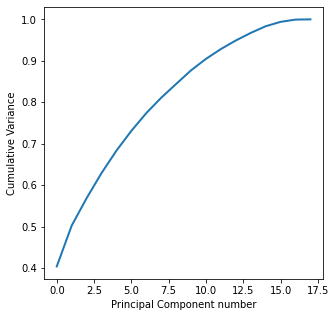

In [ ]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

n = 18
pca = PCA(n_components=n)


trainPCA = pca.fit_transform(x_train_resampled)
testPCA = pca.transform(x_test_scaled)

print(x_train_resampled.shape)
print(trainPCA.shape)
print(x_test_scaled.shape)
print(testPCA.shape)

evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()



# **Estimator Optimization**

Below we will mention the selection of hyperparameters for each of our models. The selection of each hyperparameter for each model was made after a study of its "offer" in our model.


In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import median_absolute_error as mae

## **Ridge Regressor**

Selection of hyperparameters: 
* **alpha** :Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. 
* **solver**: Solver to use in the computational routines. Contains: auto, svd, cholesky, sparse_cg, sag and lsqr

### Scoring **Mean Square Error**

* For the hyperparameter alpha we initially chose a wide range of values ​​from 30 to 100. We noticed that the optimal value is in the range 87 to 94 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter solver, we have chosen all the possible options.

In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11,10,9]

solver = ['auto', 'svd','cholesky','sparse_cg','sag','lsqr']

alpha = [30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110]

pipe = Pipeline(steps=[('pca', pca), ('rr', rr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, rr__solver=solver,rr__alpha=alpha),scoring='neg_mean_squared_error',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'pca__n_components': 16, 'rr__alpha': 90, 'rr__solver': 'sag'}


In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11,10,9]

solver = ['auto', 'svd','cholesky','sparse_cg','sag','lsqr']

alpha = [87,88,89,90,91,92,93,94]

pipe = Pipeline(steps=[('pca', pca), ('rr', rr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, rr__solver=solver,rr__alpha=alpha),scoring='neg_mean_squared_error',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rr',
                 Ridge(alpha=90, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='sag',
                       tol=0.001))],
         verbose=False)
{'pca__n_components': 16, 'rr__alpha': 90, 'rr__solver': 'sag'}


Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['rr_mse'] = time.time() - start_time

start_time = time.time()

rr_preds_mse= estimator.predict(x_test_scaled)

times_test_aft['rr_mse'] = time.time() - start_time

In [ ]:
rr_mse = mse(y_test, rr_preds_mse)

print('Before:',rr_mse_score,'After:',rr_mse)

Before: 1.026439360760079 After: 0.9579225576541655


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

rr_preds_mse_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rr',
                 Ridge(alpha=89, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='sag',
                       tol=0.001))],
         verbose=False)
{'pca__n_components': 16, 'rr__alpha': 89, 'rr__solver': 'sag'}


In [ ]:
print('Before:',rr_mse_score,'After:',mse(y_test, rr_preds_mse_resampled))

Before: 1.026439360760079 After: 1.0216515373364181


The results without resampling are better than those with resampling, so we keep the the first ones.

### Scoring **R² or Coefficient of Determination**
  
* For the hyperparameter alpha we initially chose a wide range of values ​​from 30 to 110. We noticed that the optimal value is in the range 103 to 111 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter solver, we have chosen all the possible options.

In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11,10,9]

sosolver = ['auto', 'svd','cholesky','sparse_cg','sag','lsqr']

alpha =  [30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110]

pipe = Pipeline(steps=[('pca', pca), ('rr', rr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, rr__solver=solver,rr__alpha=alpha),scoring='r2',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'pca__n_components': 16, 'rr__alpha': 110, 'rr__solver': 'sag'}


In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11,10,9]

solver = ['auto', 'svd','cholesky','sparse_cg','sag','lsqr']

alpha = [103,104,105,106,107,108,109,110,111]

pipe = Pipeline(steps=[('pca', pca), ('rr', rr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, rr__solver=solver,rr__alpha=alpha),scoring='r2',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rr',
                 Ridge(alpha=110, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='sag', tol=0.001))],
         verbose=False)
{'pca__n_components': 16, 'rr__alpha': 110, 'rr__solver': 'sag'}


Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['rr_r2'] = time.time() - start_time

start_time = time.time()

rr_preds_r2= estimator.predict(x_test_scaled)

times_test_aft['rr_r2'] = time.time() - start_time

In [ ]:
rr_r2 = r2(y_test, rr_preds_r2)

print('Before:',rr_r2_score,'After:',rr_r2)

Before: 0.5698732612251729 After: 0.5985868496165757


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

rr_preds_r2_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=9,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rr',
                 Ridge(alpha=103, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='sag', tol=0.001))],
         verbose=False)
{'pca__n_components': 9, 'rr__alpha': 103, 'rr__solver': 'sag'}


In [ ]:
print('Before:',rr_r2_score,'After:',r2(y_test, rr_preds_r2_resampled))

Before: 0.5698732612251729 After: 0.5639438732971995


The results without resampling are better than those with resampling, so we keep the the first ones.

### Scoring **Median Absolute Error**

* For the hyperparameter alpha we initially chose a wide range of values ​​from 5 to 110. We noticed that the optimal value is in the range 7 to 15 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter solver, we have chosen all the possible options.

In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11,10,9]

solver = ['auto', 'svd','cholesky','sparse_cg','sag','lsqr']

alpha = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110]

pipe = Pipeline(steps=[('pca', pca), ('rr', rr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, rr__solver=solver,rr__alpha=alpha),scoring='neg_median_absolute_error',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'pca__n_components': 10, 'rr__alpha': 5, 'rr__solver': 'sag'}


In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11,10,9]

solver = ['auto', 'svd','cholesky','sparse_cg','sag','lsqr']

alpha = [7,8,9,10,11,12,13,14,15]

pipe = Pipeline(steps=[('pca', pca), ('rr', rr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, rr__solver=solver,rr__alpha=alpha),scoring='neg_median_absolute_error',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rr',
                 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='sag',
                       tol=0.001))],
         verbose=False)
{'pca__n_components': 10, 'rr__alpha': 10, 'rr__solver': 'sag'}


Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['rr_mae'] = time.time() - start_time

start_time = time.time()

rr_preds_mae= estimator.predict(x_test_scaled)

times_test_aft['rr_mae'] = time.time() - start_time

In [ ]:
rr_mae = mae(y_test, rr_preds_mae)
print('Before:',rr_mae_score,'After:',rr_mae)

Before: 0.7023837169722364 After: 0.6631599858914168


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

rr_preds_mae_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rr',
                 Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='sag',
                       tol=0.001))],
         verbose=False)
{'pca__n_components': 16, 'rr__alpha': 15, 'rr__solver': 'sag'}


In [ ]:
print('Before:',rr_mae_score,'After:',mae(y_test, rr_preds_mae_resampled))

Before: 0.7023837169722364 After: 0.6838350348692881


The results without resampling are better than those with resampling, so we keep the the first ones.

## **Lasso Regressor**


Selection of hyperparameters: 
* **alpha** :Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization
* **selection**: If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. 

### Scoring **Mean Square Error**

* For the hyperparameter alpha we initially chose a wide range of values ​​from 0.0001 to 1. We noticed that the optimal value is in the range 0.007 to 0.07 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter selection, we have chosen all the possible options.

In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11]

selection = ['cyclic']

alpha = [0.0001,0.0002,0.0005,0.0008,0.001,0.002,0.005,0.008,0.01,0.02,0.05,0.08,1]

pipe = Pipeline(steps=[('pca', pca), ('lr', lr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, lr__selection=selection,lr__alpha=alpha),scoring='neg_mean_squared_error',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'lr__alpha': 0.01, 'lr__selection': 'cyclic', 'pca__n_components': 16}


In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11]

selection = ['cyclic', 'random']

alpha = [0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07]
pipe = Pipeline(steps=[('pca', pca), ('lr', lr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, lr__selection=selection,lr__alpha=alpha),scoring='neg_mean_squared_error',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lr',
                 Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
{'lr__alpha': 0.01, 'lr__selection': 'cyclic', 'pca__n_components': 16}


Without Oversampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['lr_mse'] = time.time() - start_time

start_time = time.time()

lr_preds_mse= estimator.predict(x_test_scaled)

times_test_aft['lr_mse'] = time.time() - start_time

In [ ]:
lr_mse = mse(y_test, lr_preds_mse)

print('Before:',lr_mse_score,'After:',lr_mse)

Before: 1.056355289576955 After: 0.9589923474640358


With Oversampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

lr_preds_mse_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lr',
                 Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
{'lr__alpha': 0.01, 'lr__selection': 'cyclic', 'pca__n_components': 16}


In [ ]:
print('Before:',lr_mse_score,'After:',mse(y_test, lr_preds_mse_resampled))

Before: 1.056355289576955 After: 1.0204582541219658


The results without resampling are better than those with resampling, so we keep the the first ones.

### Scoring **R² or Coefficient of Determination**
  
* For the hyperparameter alpha we initially chose a wide range of values ​​from 0.0001 to 1. We noticed that the optimal value is in the range 0.005 to 0.08 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter selection, we have chosen all the possible options.

In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11]

selection = ['cyclic', 'random']

alpha = [0.0001,0.0002,0.0005,0.0008,0.001,0.002,0.005,0.008,0.01,0.02,0.05,0.08,1]

pipe = Pipeline(steps=[('pca', pca), ('lr', lr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, lr__selection=selection,lr__alpha=alpha),scoring='r2',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'lr__alpha': 0.008, 'lr__selection': 'cyclic', 'pca__n_components': 16}


In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11]

selection = ['cyclic', 'random']

alpha = [0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]

pipe = Pipeline(steps=[('pca', pca), ('lr', lr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, lr__selection=selection,lr__alpha=alpha),scoring='r2',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lr',
                 Lasso(alpha=0.007, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
{'lr__alpha': 0.007, 'lr__selection': 'cyclic', 'pca__n_components': 16}


Without Oversampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['lr_r2'] = time.time() - start_time

start_time = time.time()

lr_preds_r2= estimator.predict(x_test_scaled)

times_test_aft['lr_r2'] = time.time() - start_time

In [ ]:
lr_r2 = r2(y_test, lr_preds_r2)

print('Before:',lr_r2_score,'After:',lr_r2)

Before: 0.5573370692285076 After: 0.5984073022404273


With Oversampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

lr_preds_r2_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lr',
                 Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
{'lr__alpha': 0.005, 'lr__selection': 'cyclic', 'pca__n_components': 16}


In [ ]:
print('Before:',lr_r2_score,'After:',r2(y_test, lr_preds_r2_resampled))

Before: 0.5277524947253871 After: 0.5422230655572138


The results without resampling are better than those with resampling, so we keep the the first ones.

### Scoring **Median Absolute Error**

* For the hyperparameter alpha we initially chose a wide range of values ​​from 0.0001 to 1. We noticed that the optimal value is in the range 0.008 to 0.07 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter selection, we have chosen all the possible options.

In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11]

selection = ['cyclic', 'random']

alpha = [0.0001,0.0002,0.0005,0.0008,0.001,0.002,0.005,0.008,0.01,0.02,0.05,0.08,1]

pipe = Pipeline(steps=[('pca', pca), ('lr', lr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, lr__selection=selection,lr__alpha=alpha),scoring='neg_median_absolute_error',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'lr__alpha': 0.01, 'lr__selection': 'cyclic', 'pca__n_components': 14}


In [ ]:
from sklearn.pipeline import Pipeline

n_components = [16,15,14,13,12,11]

selection = ['cyclic', 'random']

alpha = [0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07]

pipe = Pipeline(steps=[('pca', pca), ('lr', lr)], memory = 'tmp')

estimator = GridSearchCV(pipe, dict( pca__n_components=n_components, lr__selection=selection,lr__alpha=alpha),scoring='neg_median_absolute_error',cv=10, n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lr',
                 Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='random',
                       tol=0.0001, warm_start=False))],
         verbose=False)
{'lr__alpha': 0.01, 'lr__selection': 'random', 'pca__n_components': 14}


Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['lr_mae'] = time.time() - start_time

start_time = time.time()

lr_preds_mae= estimator.predict(x_test_scaled)

times_test_aft['lr_mae'] = time.time() - start_time

In [ ]:
lr_mae = mae(y_test, lr_preds_mae)

print('Before:',lr_mae_score,'After:',lr_mae)

Before: 0.7312872104257115 After: 0.6625729218247791


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

lr_preds_mae_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lr',
                 Lasso(alpha=0.03, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
{'lr__alpha': 0.03, 'lr__selection': 'cyclic', 'pca__n_components': 15}


In [ ]:
print('Before:',lr_mae_score,'After:',mae(y_test, lr_preds_mae_resampled))

Before: 0.7312872104257115 After: 0.703378404895779


The results without resampling are better than those with resampling, so we keep the the first ones.

## **Elastic Net Regressor**

Selection of hyperparameters: 
* **alpha** :Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization
* **l1_ratio**: The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
* **selction**: If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This often leads to significantly faster convergence especially when tol is higher than 1e-4 (default tolerance).


### Scoring **Mean Square Error**

* For the alpha hyperparameter we initially chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.007 to 0.05 so we chose the following values ​​for this parameter.
* For the hyperparameter l1_ratio we chose a wide range of values ​​from 0 to 1
* Regarding the hyperparameter selection, we chose all the possible options

In [ ]:
from sklearn.pipeline import Pipeline

parameters_enr = { 'pca__n_components' : [16,15,14,13,12,11],
                  'enr__selection' : ['cyclic', 'random'],
                  'enr__alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1],
                  'enr__l1_ratio' : [0,0.1,0.2,0.5,0.7,0.8,0.9,1]
                }

pipe = Pipeline(steps=[('pca', pca), ('enr', enr)], memory = 'tmp')

estimator = GridSearchCV(pipe, param_grid = parameters_enr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'enr__alpha': 0.01, 'enr__l1_ratio': 0.7, 'enr__selection': 'cyclic', 'pca__n_components': 16}


In [ ]:
from sklearn.pipeline import Pipeline

parameters_enr = { 'pca__n_components' : [16,15,14,13,12,11],
                  'enr__selection' : ['cyclic', 'random'],
                  'enr__alpha' : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08],
                  'enr__l1_ratio' : [0,0.1,0.2,0.5,0.7,0.8,0.9,1]
                }

pipe = Pipeline(steps=[('pca', pca), ('enr', enr)], memory = 'tmp')

estimator = GridSearchCV(pipe, param_grid = parameters_enr, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('enr',
                 ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True,
                            l1_ratio=0.1, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)
{'enr__alpha': 0.05, 'enr__l1_ratio': 0.1, 'enr__selection': 'cyclic', 'pca__n_components': 16}


Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['enr_mse'] = time.time() - start_time

start_time = time.time()

enr_preds_mse = estimator.predict(x_test_scaled)

times_test_aft['enr_mse'] = time.time() - start_time

In [ ]:
enr_mse = mse(y_test, enr_preds_mse)

print('Before:',enr_mse_score,'After:',enr_mse)

Before: 1.046897894903197 After: 0.958386544379006


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

enr_preds_mse_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('enr',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=1, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)
{'enr__alpha': 0.001, 'enr__l1_ratio': 1, 'enr__selection': 'cyclic', 'pca__n_components': 16}


In [ ]:
print('Before:',enr_mse_score,'After:',mse(y_test, enr_preds_mse_resampled))

Before: 1.046897894903197 After: 1.0231501949719926


The results without resampling are better than those with resampling, so we keep the the first ones.

### Scoring **R² or Coefficient of Determination**

* For the alpha hyperparameter we initially chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.007 to 0.05 so we chose the following values ​​for this parameter.
* For the hyperparameter l1_ratio we chose a wide range of values ​​from 0 to 1.
* Regarding the hyperparameter selection, we chose all the possible options


In [ ]:
from sklearn.pipeline import Pipeline

parameters_enr = { 'pca__n_components' : [16,15,14,13,12,11],
                  'enr__selection' : ['cyclic', 'random'],
                  'enr__alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1],
                  'enr__l1_ratio' : [0,0.1,0.2,0.5,0.7,0.8,0.9,1]
                }

pipe = Pipeline(steps=[('pca', pca), ('enr', enr)], memory = 'tmp')

estimator = GridSearchCV(pipe, param_grid = parameters_enr, cv = 10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'enr__alpha': 0.01, 'enr__l1_ratio': 0.7, 'enr__selection': 'cyclic', 'pca__n_components': 16}


In [ ]:
from sklearn.pipeline import Pipeline

parameters_enr = { 'pca__n_components' : [16,15,14,13,12,11],
                  'enr__selection' : ['cyclic', 'random'],
                  'enr__alpha' : [0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05],
                  'enr__l1_ratio' : [0,0.1,0.2,0.5,0.7,0.8,0.9,1]
                }

pipe = Pipeline(steps=[('pca', pca), ('enr', enr)], memory = 'tmp')

estimator = GridSearchCV(pipe, param_grid = parameters_enr, cv = 10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('enr',
                 ElasticNet(alpha=0.008, copy_X=True, fit_intercept=True,
                            l1_ratio=0.9, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)
{'enr__alpha': 0.008, 'enr__l1_ratio': 0.9, 'enr__selection': 'cyclic', 'pca__n_components': 16}


Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['enr_r2'] = time.time() - start_time

start_time = time.time()

enr_preds_r2 = estimator.predict(x_test_scaled)

times_test_aft['enr_r2'] = time.time() - start_time

In [ ]:
enr_r2 = r2(y_test, enr_preds_r2)

print('Before:',enr_r2_score,'After:',enr_r2)

Before: 0.5613001658164227 After: 0.5983868617148475


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

enr_preds_r2_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('enr',
                 ElasticNet(alpha=0.007, copy_X=True, fit_intercept=True,
                            l1_ratio=0, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='random', tol=0.0001,
                            warm_start=False))],
         verbose=False)
{'enr__alpha': 0.007, 'enr__l1_ratio': 0, 'enr__selection': 'random', 'pca__n_components': 16}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2581.107785173951, tolerance: 2.31
  positive)


In [ ]:
print('Before:',enr_r2_score,'After:',r2(y_test, enr_preds_r2_resampled))

Before: 0.5613001658164227 After: 0.5714041917164454


The results without resampling are better than those with resampling, so we keep the the first ones.

### Scoring **Median Absolute Error**

* For the alpha hyperparameter we initially chose a wide range of values ​​from 0.001 to 1. We noticed that the optimal value is in the range 0.01 to 0.08 so we chose the following values ​​for this parameter.
* For the hyperparameter l1_ratio we chose a wide range of values ​​from 0 to 1.
* Regarding the hyperparameter selection, we chose all the possible options

In [ ]:
from sklearn.pipeline import Pipeline

parameters_enr = { 'pca__n_components' : [16,15,14,13,12,11],
                  'enr__selection' : ['cyclic', 'random'],
                  'enr__alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1],
                  'enr__l1_ratio' : [0,0.1,0.2,0.5,0.7,0.8,0.9,1]
                }

pipe = Pipeline(steps=[('pca', pca), ('enr', enr)], memory = 'tmp')

estimator = GridSearchCV(pipe, param_grid = parameters_enr, cv = 10, scoring='neg_median_absolute_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'enr__alpha': 0.05, 'enr__l1_ratio': 0.1, 'enr__selection': 'cyclic', 'pca__n_components': 14}


In [ ]:
from sklearn.pipeline import Pipeline

parameters_enr = { 'pca__n_components' : [16,15,14,13,12,11],
                  'enr__selection' : ['cyclic', 'random'],
                  'enr__alpha' : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08],
                  'enr__l1_ratio' : [0,0.1,0.3,0.5,0.7,0.8,0.9,1]
                }


pipe = Pipeline(steps=[('pca', pca), ('enr', enr)], memory = 'tmp')

estimator = GridSearchCV(pipe, param_grid = parameters_enr, cv = 10, scoring='neg_median_absolute_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('enr',
                 ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True,
                            l1_ratio=0.1, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='random', tol=0.0001,
                            warm_start=False))],
         verbose=False)
{'enr__alpha': 0.05, 'enr__l1_ratio': 0.1, 'enr__selection': 'random', 'pca__n_components': 14}


In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['enr_mae'] = time.time() - start_time

start_time = time.time()

enr_preds_mae = estimator.predict(x_test_scaled)

times_test_aft['enr_mae'] = time.time() - start_time

In [ ]:
enr_mae = mae(y_test, enr_preds_mae)

print('Before:',enr_mae_score,'After:',enr_mae)

Before: 0.7248121335376689 After: 0.6630373083768308


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

enr_preds_mae_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('enr',
                 ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True,
                            l1_ratio=0, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)
{'enr__alpha': 0.05, 'enr__l1_ratio': 0, 'enr__selection': 'cyclic', 'pca__n_components': 16}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2627.397309799964, tolerance: 2.31
  positive)


In [ ]:
print('Before:',enr_mae_score,'After:',mae(y_test, enr_preds_mae_resampled))

Before: 0.7248121335376689 After: 0.6873260739816622


The results without resampling are better than those with resampling, so we keep the the first ones.

## **Support Vector Machine Regressor**

Selection of hyperparameters: 
* **kernel** :Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.
* **C**: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
* **gamma**: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

### Scoring **Mean Squared Error**

* For the hyperparameter C we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is in the range 2 to 5 so we chose the following values ​​for this parameter.
*  For the hyperparameter C we initially chose a wide range of values ​​from 0.0001 to 0.1. We noticed that the optimal value is in the range 0.001 to 0.1 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter kernel, we have chosen all the possible options.

In [ ]:
from sklearn.pipeline import Pipeline

param_grid_svmr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'svmr__kernel': ['rbf'],
              'svmr__C': [1,5,10],
              'svmr__gamma':[0.0001,0.001,0.01,0.1] }
              
pipe = Pipeline(steps=[ ('pca', pca), ('svmr', svmr)])

estimator = GridSearchCV(pipe, param_grid_svmr, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'pca__n_components': 16, 'svmr__C': 5, 'svmr__gamma': 0.01, 'svmr__kernel': 'rbf'}


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_svmr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'svmr__kernel': ['rbf'],
              'svmr__C': [2,3,4,5],
              'svmr__gamma':[0.001,0.01,0.1] }
              
pipe = Pipeline(steps=[ ('pca', pca), ('svmr', svmr)])

estimator = GridSearchCV(pipe, param_grid_svmr, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svmr',
                 SVR(C=4, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma=0.01, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
{'pca__n_components': 16, 'svmr__C': 4, 'svmr__gamma': 0.01, 'svmr__kernel': 'rbf'}


Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['svmr_mse'] = time.time() - start_time

start_time = time.time()

svmr_preds_mse= estimator.predict(x_test_scaled)

times_test_aft['svmr_mse'] = time.time() - start_time

In [ ]:
svmr_mse = mse(y_test, svmr_preds_mse)

print('Before:',svmr_mse_score,'After:',svmr_mse)

Before: 2.09930337359493 After: 0.924617269604936


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled.values.ravel())

svmr_preds_mse_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svmr',
                 SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma=0.1, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
{'pca__n_components': 16, 'svmr__C': 5, 'svmr__gamma': 0.1, 'svmr__kernel': 'rbf'}


In [ ]:
print('Before:',svmr_mse_score,'After:',mse(y_test, svmr_preds_mse_resampled))

Before: 2.09930337359493 After: 1.2850510134920987


The results without resampling are better than those with resampling, so we keep the the first ones.

### Scoring **R² or Coefficient of Determination**
  
* For the hyperparameter C we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is in the range 2 to 5 so we chose the following values ​​for this parameter.
*  For the hyperparameter C we initially chose a wide range of values ​​from 0.0001 to 0.1. We noticed that the optimal value is in the range 0.001 to 0.1 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter kernel, we have chosen all the possible options.

In [ ]:
from sklearn.pipeline import Pipeline

param_grid_svmr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'svmr__kernel': ['rbf'],
              'svmr__C': [1,5,10],
              'svmr__gamma':[0.0001,0.001,0.01,0.1] }
              
pipe = Pipeline(steps=[ ('pca', pca), ('svmr', svmr)])

estimator = GridSearchCV(pipe, param_grid_svmr, cv=10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'pca__n_components': 16, 'svmr__C': 5, 'svmr__gamma': 0.01, 'svmr__kernel': 'rbf'}


Without Resampling

In [ ]:
from sklearn.pipeline import Pipeline

param_grid_svmr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'svmr__kernel': ['rbf'],
              'svmr__C': [2,3,4,5],
              'svmr__gamma':[0.001,0.01,0.1] }
              
pipe = Pipeline(steps=[ ('pca', pca), ('svmr', svmr)])

estimator = GridSearchCV(pipe, param_grid_svmr, cv=10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svmr',
                 SVR(C=4, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma=0.01, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
{'pca__n_components': 16, 'svmr__C': 4, 'svmr__gamma': 0.01, 'svmr__kernel': 'rbf'}


Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['svmr_r2'] = time.time() - start_time

start_time = time.time()

svmr_preds_r2= estimator.predict(x_test_scaled)

times_test_aft['svmr_r2'] = time.time() - start_time

In [ ]:
svmr_r2 = r2(y_test, svmr_preds_r2)

print('Before:',svmr_r2_score,'After:',svmr_r2)

Before: 0.12029239300144101 After: 0.612541543130656


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled.values.ravel())

svmr_preds_r2_resampled = estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svmr',
                 SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma=0.1, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
{'pca__n_components': 16, 'svmr__C': 5, 'svmr__gamma': 0.1, 'svmr__kernel': 'rbf'}


In [ ]:
print('Before:', svmr_r2_score ,'After:', r2(y_test, svmr_preds_r2_resampled))

Before: 0.11920673660340797 After: 0.44102677052018724


The results without resampling are better than those with resampling, so we keep the the first ones.

### Scoring **Median Absolute Error**

* For the hyperparameter C we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is in the range 2 to 5 so we chose the following values ​​for this parameter.
*  For the hyperparameter C we initially chose a wide range of values ​​from 0.0001 to 0.1. We noticed that the optimal value is in the range 0.001 to 0.1 so we chose the following values ​​for this parameter.
* Regarding the hyperparameter kernel, we have chosen all the possible options.

In [ ]:
from sklearn.pipeline import Pipeline

param_grid_svmr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'svmr__kernel': ['rbf'],
              'svmr__C': [1,5,10],
              'svmr__gamma':[0.0001,0.001,0.01,0.1]}
              
pipe = Pipeline(steps = [ ('pca', pca), ('svmr', svmr)])

estimator = GridSearchCV(pipe, param_grid_svmr, cv=10, scoring='neg_median_absolute_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'pca__n_components': 13, 'svmr__C': 5, 'svmr__gamma': 0.01, 'svmr__kernel': 'rbf'}


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_svmr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'svmr__kernel': ['rbf'],
              'svmr__C': [2,3,4,5],
              'svmr__gamma':[0.001,0.01,0.1] }
              
pipe = Pipeline(steps=[ ('pca', pca), ('svmr', svmr)])

estimator = GridSearchCV(pipe, param_grid_svmr, cv=10, scoring='neg_median_absolute_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=13,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svmr',
                 SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma=0.01, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
{'pca__n_components': 13, 'svmr__C': 5, 'svmr__gamma': 0.01, 'svmr__kernel': 'rbf'}


Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['svmr_mae'] = time.time() - start_time

start_time = time.time()

svmr_preds_mae= estimator.predict(x_test_scaled)

times_test_aft['svmr_mae'] = time.time() - start_time

In [ ]:
svmr_mae = mae(y_test, svmr_preds_mse)

print('Before:',svmr_mae_score,'After:',svmr_mae)

Before: 0.9900865801267624 After: 0.649420120953291


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled.values.ravel())

svmr_preds_mae_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svmr',
                 SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma=0.1, kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
{'pca__n_components': 16, 'svmr__C': 5, 'svmr__gamma': 0.1, 'svmr__kernel': 'rbf'}


In [ ]:
print('Before:',svmr_mae_score,'After:',mae(y_test, svmr_preds_mae_resampled))

Before: 0.9900865801267624 After: 0.7440306614077556


The results without resampling are better than those with resampling, so we keep the the first ones.

## **Decision Tree Regressor**
Selection of hyperparameters: 
* **splitter** :The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
* **criterion**: The function to measure the quality of a split. 
* **min samples spit**: The minimum number of samples required to split an internal node.
* **max depth**: The maximum depth of the tree.
* **min samples leaf**: The minimum number of samples required to be at a leaf node.
* **max leaf nodes**: Best nodes are defined as relative reduction in impurity.

### Scoring **Mean Squared Error**

* Regarding the hyperparameter splitter, we have chosen all the possible options.
* Regarding the hyperparameter criterion, we have chosen mse.
* For the hyperparameter min_samples_split we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is in the range 2 to 8 so we chose the following values ​​for this parameter.
* For the hyperparameter max_depth we initially chose a wide range of values ​​from 1 to 20. We noticed that the optimal value is in the range 5 to 9 so we chose the following values ​​for this parameter.
* For the hyperparameter min_samples_leaf we initially chose a wide range of values ​​from 80 to 120. We noticed that the optimal value is in the range 95 to 98 so we chose the following values ​​for this parameter.
* For the hyperparameter max_leaf_nodes we initially chose a wide range of values ​​from 10 to 30. We noticed that the optimal value is in the range 14 to 18 so we chose the following values ​​for this parameter.

In [ ]:
from sklearn.pipeline import Pipeline


param_grid_dtr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'dtr__splitter':['best','random'],
              'dtr__criterion' : ['mse'],
              'dtr__min_samples_split' : [1,3,5,8,10],
              'dtr__max_depth':[1,5,10,15,20],
              'dtr__min_samples_leaf': [80,85,90,95,100,105,110,115,120],
               'dtr__max_leaf_nodes': [10,15,20,25,30]}


pipe = Pipeline(steps=[ ('pca', pca), ('dtr', dtr)])

estimator = GridSearchCV(pipe, param_grid_dtr, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'dtr__criterion': 'mse', 'dtr__max_depth': 5, 'dtr__max_leaf_nodes': 15, 'dtr__min_samples_leaf': 120, 'dtr__min_samples_split': 3, 'dtr__splitter': 'best', 'pca__n_components': 10}


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_dtr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'dtr__splitter':['best','random'],
              'dtr__criterion' : ['mse'],
              'dtr__min_samples_split' : [2,3,4,5,6,7,8],
              'dtr__max_depth':[5, 6, 7,8,9],
              'dtr__min_samples_leaf': [ 95,96,97,98],
               'dtr__max_leaf_nodes': [14,15,16,17,18]
               }


pipe = Pipeline(steps=[ ('pca', pca), ('dtr', dtr)])

estimator = GridSearchCV(pipe, param_grid_dtr, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=13,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dtr',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=5, max_features=None,
                                       max_leaf_nodes=16,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=97, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)
{'dtr__criterion': 'mse', 'dtr__max_depth': 5, 'dtr__max_leaf_nodes': 16, 'dtr__min_samples_leaf': 97, 'dtr__m

Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['dtr_mse'] = time.time() - start_time

start_time = time.time()

dtr_preds_mse= estimator.predict(x_test_scaled)

times_test_aft['dtr_mse'] = time.time() - start_time

In [ ]:
dtr_mse = mse(y_test, dtr_preds_mse)

print('Before:',dtr_mse_score,'After:',dtr_mse)

Before: 1.7056199821587867 After: 1.0883640214847774


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

dtr_preds_mse_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dtr',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=5, max_features=None,
                                       max_leaf_nodes=18,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=98, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)
{'dtr__criterion': 'mse', 'dtr__max_depth': 5, 'dtr__max_leaf_nodes': 18, 'dtr__min_samples_leaf': 98, 'dtr__m

In [ ]:
print('Before:',dtr_mse_score,'After:',mse(y_test, dtr_preds_mse_resampled))

Before: 1.7056199821587867 After: 1.287078604025575


The results without resampling are better than those with resampling, so we keep the the first ones.

### Scoring **R² or Coefficient of Determination**
  
* Regarding the hyperparameter splitter, we have chosen all the possible options.
* Regarding the hyperparameter criterion, we have chosen mse.
* For the hyperparameter min_samples_split we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is in the range 1 to 3 so we chose the following values ​​for this parameter.
* For the hyperparameter max_depth we initially chose a wide range of values ​​from 1 to 20. We noticed that the optimal value is in the range 5 to 9 so we chose the following values ​​for this parameter.
* For the hyperparameter min_samples_leaf we initially chose a wide range of values ​​from 80 to 120. We noticed that the optimal value is in the range 95 to 98 so we chose the following values ​​for this parameter.
* For the hyperparameter max_leaf_nodes we initially chose a wide range of values ​​from 10 to 30. We noticed that the optimal value is in the range 14 to 18 so we chose the following values ​​for this parameter.

In [ ]:
from sklearn.pipeline import Pipeline

param_grid_dtr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'dtr__splitter':['best','random'],
              'dtr__criterion' : ['mse'],
              'dtr__min_samples_split' : [1,3,5,8,10],
              'dtr__max_depth':[1,5,10,15,20],
              'dtr__min_samples_leaf': [80,85,90,95,100,105,110,115,120],
               'dtr__max_leaf_nodes': [10,15,20,25,30]}


pipe = Pipeline(steps=[ ('pca', pca), ('dtr', dtr)])

estimator = GridSearchCV(pipe, param_grid_dtr, cv=10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'dtr__criterion': 'mse', 'dtr__max_depth': 5, 'dtr__max_leaf_nodes': 20, 'dtr__min_samples_leaf': 85, 'dtr__min_samples_split': 3, 'dtr__splitter': 'best', 'pca__n_components': 12}


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_dtr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'dtr__splitter':['best','random'],
              'dtr__criterion' : ['mse'],
              'dtr__min_samples_split' : [1,2,3],
              'dtr__max_depth':[5, 6, 7,8,9],
              'dtr__min_samples_leaf': [ 95,96,97,98],
               'dtr__max_leaf_nodes': [14,15,16,17,18]}


pipe = Pipeline(steps=[ ('pca', pca), ('dtr', dtr)])

estimator = GridSearchCV(pipe, param_grid_dtr, cv=10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=13,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dtr',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=5, max_features=None,
                                       max_leaf_nodes=16,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=97, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)
{'dtr__criterion': 'mse', 'dtr__max_depth': 5, 'dtr__max_leaf_nodes': 16, 'dtr__min_samples_leaf': 97, 'dtr__m

Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['dtr_r2'] = time.time() - start_time

start_time = time.time()

dtr_preds_r2= estimator.predict(x_test_scaled)

times_test_aft['dtr_r2'] = time.time() - start_time

In [ ]:
dtr_r2 = r2(y_test, dtr_preds_r2)

print('Before:',dtr_r2_score,'After:',dtr_r2)

Before: 0.2852643920709723 After: 0.5439238935513451


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

dtr_preds_r2_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=11,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dtr',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=5, max_features=None,
                                       max_leaf_nodes=17,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=96, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)
{'dtr__criterion': 'mse', 'dtr__max_depth': 5, 'dtr__max_leaf_nodes': 17, 'dtr__min_samples_leaf': 96, 'dtr__m

In [ ]:
print('Before:',dtr_r2_score,'After:',r2(y_test, dtr_preds_r2_resampled))

Before: 0.2688224921656187 After: 0.4649764626734777


### Scoring **Median Absolute Error**

* Regarding the hyperparameter splitter, we have chosen all the possible options.
* Regarding the hyperparameter criterion, we have chosen mse.
* For the hyperparameter min_samples_split we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is in the range 1 to 3 so we chose the following values ​​for this parameter.
* For the hyperparameter max_depth we initially chose a wide range of values ​​from 1 to 20. We noticed that the optimal value is in the range 5 to 9 so we chose the following values ​​for this parameter.
* For the hyperparameter min_samples_leaf we initially chose a wide range of values ​​from 80 to 120. We noticed that the optimal value is in the range 95 to 98 so we chose the following values ​​for this parameter.
* For the hyperparameter max_leaf_nodes we initially chose a wide range of values ​​from 10 to 30. We noticed that the optimal value is in the range 14 to 18 so we chose the following values ​​for this parameter.

In [ ]:
from sklearn.pipeline import Pipeline

param_grid_dtr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'dtr__splitter':['best','random'],
              'dtr__criterion' : ['mse'],
              'dtr__min_samples_split' : [1,3,5,8,10],
              'dtr__max_depth':[1,5,10,15,20],
              'dtr__min_samples_leaf': [80,85,90,95,100,105,110,115,120],
               'dtr__max_leaf_nodes': [10,15,20,25,30]}

pipe = Pipeline(steps=[ ('pca', pca), ('dtr', dtr)])

estimator = GridSearchCV(pipe, param_grid_dtr, cv=10, scoring='neg_median_absolute_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'dtr__criterion': 'mse', 'dtr__max_depth': 5, 'dtr__max_leaf_nodes': 10, 'dtr__min_samples_leaf': 80, 'dtr__min_samples_split': 3, 'dtr__splitter': 'best', 'pca__n_components': 9}


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_dtr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'dtr__splitter':['best','random'],
              'dtr__criterion' : ['mse'],
              'dtr__min_samples_split' : [1,2,3],
              'dtr__max_depth':[5, 6, 7,8,9],
              'dtr__min_samples_leaf': [ 95,96,97,98],
               'dtr__max_leaf_nodes': [14,15,16,17,18]}


pipe = Pipeline(steps=[ ('pca', pca), ('dtr', dtr)])

estimator = GridSearchCV(pipe, param_grid_dtr, cv=10, scoring='neg_median_absolute_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=9,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dtr',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=5, max_features=None,
                                       max_leaf_nodes=14,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=96, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='best'))],
         verbose=False)
{'dtr__criterion': 'mse', 'dtr__max_depth': 5, 'dtr__max_leaf_nodes': 14, 'dtr__min_samples_leaf': 96, 'dtr__mi

Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['dtr_mae'] = time.time() - start_time

start_time = time.time()

dtr_preds_mae= estimator.predict(x_test_scaled)

times_test_aft['dtr_mae'] = time.time() - start_time

In [ ]:
dtr_mae = mae(y_test, dtr_preds_mae)

print('Before:',dtr_mae_score,'After:',dtr_mae)

Before: 1.0 After: 0.5773195876288657


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

dtr_preds_mae_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dtr',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=7, max_features=None,
                                       max_leaf_nodes=16,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=97, min_samples_split=3,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=None,
                                       splitter='random'))],
         verbose=False)
{'dtr__criterion': 'mse', 'dtr__max_depth': 7, 'dtr__max_leaf_nodes': 16, 'dtr__min_samples_leaf': 97, 'dtr_

In [ ]:
print('Before:',dtr_mae_score,'After:',mae(y_test, dtr_preds_mae_resampled))

Before: 1.0 After: 0.7881773399014778


## **Extra Tree Regressor**
Selection of hyperparameters: 
* **n_estimators**: The number of trees in the forest.
* **max_depth**: The maximum depth of the tree. 

### Scoring **Mean Squared Error**

* For the hyperparameter n_estimators we initially chose a wide range of values ​​from 10 to 50. We noticed that the optimal value is in the range 32 to 36 so we chose the following values ​​for this parameter.
* For the hyperparameter max_depth we initially chose a wide range of values ​​from 10 to 70. We noticed that the optimal value is in the range 14 to 18 so we chose the following values ​​for this parameter.


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_etr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'etr__n_estimators': [10,20,30,40,50],
              'etr__max_depth': [10,20,30,40,50,60,70]}
              
pipe = Pipeline(steps=[ ('pca', pca), ('etr', etr)])

estimator = GridSearchCV(pipe, param_grid_etr, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'etr__max_depth': 40, 'etr__n_estimators': 50, 'pca__n_components': 13}


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_etr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'etr__n_estimators': [50,51,52,53,54,55,56,57,58,59,60],
              'etr__max_depth': [14,15,16,17,18]}
              
pipe = Pipeline(steps=[ ('pca', pca), ('etr', etr)])

estimator = GridSearchCV(pipe, param_grid_etr, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=13,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('etr',
                 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='mse', max_depth=16,
                                     max_features='auto', max_leaf_nodes=None,
                                     max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=51, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False))],
  

Without Resampling

In [ ]:
estimator.fit(x_train_scaled, y_train)

etr_preds_mse= estimator.predict(x_test_scaled)

In [ ]:
etr_mse = mse(y_test, etr_preds_mse)

print('Before:',etr_mse_score,'After:',etr_mse)

Before: 0.84875637823372 After: 0.9815625413435952


With Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_resampled, y_train_resampled)

times_train_aft['etr_mse'] = time.time() - start_time

start_time = time.time()

etr_preds_mse_resampled= estimator.predict(x_test_scaled)

times_test_aft['etr_mse'] = time.time() - start_time

print(estimator.best_estimator_)

print(estimator.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('etr',
                 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='mse', max_depth=18,
                                     max_features='auto', max_leaf_nodes=None,
                                     max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=60, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False))],
  

In [ ]:
etr_mse_resampled = mse(y_test, etr_preds_mse_resampled)

print('Before:',etr_mse_score,'After:',etr_mse_resampled)

Before: 0.84875637823372 After: 0.9725670715417838


In this metric our result is better with resampling, so we will keep this one, although the result remains worse than the first one.

### Scoring **R² or Coefficient of Determination**
  
* For the hyperparameter n_estimators we initially chose a wide range of values ​​from 10 to 50. We noticed that the optimal value is in the range 32 to 36 so we chose the following values ​​for this parameter.
* For the hyperparameter max_depth we initially chose a wide range of values ​​from 10 to 70. We noticed that the optimal value is in the range 15 to 40 so we chose the following values ​​for this parameter.

In [ ]:
from sklearn.pipeline import Pipeline

param_grid_etr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'etr__n_estimators': [10,20,30,40,50],
              'etr__max_depth': [10,20,30,40,50,60,70]}
              
pipe = Pipeline(steps=[ ('pca', pca), ('etr', etr)])

estimator = GridSearchCV(pipe, param_grid_etr, cv=10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'etr__max_depth': 10, 'etr__n_estimators': 50, 'pca__n_components': 16}


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_etr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'etr__n_estimators': [32,33,34,35,36],
              'etr__max_depth': [14,15,16,17,18]}
              
pipe = Pipeline(steps=[ ('pca', pca), ('etr', etr)])

estimator = GridSearchCV(pipe, param_grid_etr, cv=10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=13,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('etr',
                 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='mse', max_depth=14,
                                     max_features='auto', max_leaf_nodes=None,
                                     max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=33, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False))],
  

Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['etr_r2'] = time.time() - start_time

start_time = time.time()

etr_preds_r2 = estimator.predict(x_test_scaled)

times_test_aft['etr_r2'] = time.time() - start_time

In [ ]:
etr_r2 = r2(y_test, etr_preds_r2)

print('Before:',etr_r2_score,'After:',etr_r2)

Before: 0.6443308519329706 After: 0.586245179363512


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

etr_preds_r2_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('etr',
                 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='mse', max_depth=18,
                                     max_features='auto', max_leaf_nodes=None,
                                     max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=36, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False))],
  

In [ ]:
etr_r2_resampled = r2(y_test, etr_preds_r2_resampled)

print('Before:',etr_r2_score,'After:',etr_r2_resampled)

Before: 0.6443308519329706 After: 0.5890088797019177


In this metric our result is better without resampling,so we will keep this one, although the result remains worse than the first one.

### Scoring **Median Absolute Error**

* For the hyperparameter n_estimators we initially chose a wide range of values ​​from 10 to 50. We noticed that the optimal value is in the range 29 to 36 so we chose the following values ​​for this parameter.
* For the hyperparameter max_depth we initially chose a wide range of values ​​from 10 to 70. We noticed that the optimal value is in the range 68 to 76 so we chose the following values ​​for this parameter.

In [ ]:
from sklearn.pipeline import Pipeline

param_grid_etr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'etr__n_estimators': [10,20,30,40,50],
              'etr__max_depth': [10,20,30,40,50,60,70]}
              
pipe = Pipeline(steps=[ ('pca', pca), ('etr', etr)])

estimator = GridSearchCV(pipe, param_grid_etr, cv=10, scoring='neg_median_absolute_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'etr__max_depth': 70, 'etr__n_estimators': 30, 'pca__n_components': 14}


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_etr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'etr__n_estimators': [29,30,31,32,33,34,35,36],
              'etr__max_depth': [68,69,70,71,72,73,74,75,76]}
              
pipe = Pipeline(steps=[ ('pca', pca), ('etr', etr)])

estimator = GridSearchCV(pipe, param_grid_etr, cv=10, scoring='neg_median_absolute_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=13,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('etr',
                 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='mse', max_depth=73,
                                     max_features='auto', max_leaf_nodes=None,
                                     max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=34, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False))],
  

Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['etr_mae'] = time.time() - start_time

start_time = time.time()

etr_preds_mae= estimator.predict(x_test_scaled)

times_test_aft['etr_mae'] = time.time() - start_time

In [ ]:
etr_mae = mae(y_test, etr_preds_mae)

print('Before:',etr_mae_score,'After:',etr_mae)

Before: 0.6299999999999999 After: 0.65625


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

etr_preds_mae_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=12,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('etr',
                 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='mse', max_depth=73,
                                     max_features='auto', max_leaf_nodes=None,
                                     max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=32, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False))],
  

In [ ]:
print('Before:',etr_mae_score,'After:',mae(y_test, etr_preds_mae_resampled))

Before: 0.6299999999999999 After: 0.65625


In this metric the result between resampling and without resampling is the same. Still worse than the first one.

## **Gradient Boosting Regressor**
Selection of hyperparameters: 
* **n_estimators**: The number of boosting stages to perform. 
* **max_depth**: Maximum depth of the individual regression estimators.

### Scoring **Mean Square Error**

* For the hyperparameter n_estimators we initially chose a wide range of values ​​from 30 to 60. We noticed that the optimal value is in the range 31 to 37 so we chose the following values ​​for this parameter.
* For the hyperparameter max_depth we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is in the range 2 to 6 so we chose the following values ​​for this parameter.

In [ ]:
from sklearn.pipeline import Pipeline

param_grid_gbr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'gbr__n_estimators':[30,40,50,60],
              'gbr__max_depth':[1,3,5,7,10]}
              
pipe = Pipeline(steps=[ ('pca', pca), ('gbr', gbr)])

estimator = GridSearchCV(pipe, param_grid_gbr, cv=10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'gbr__max_depth': 5, 'gbr__n_estimators': 30, 'pca__n_components': 12}


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_gbr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'gbr__n_estimators':[31,32,33,34,35,36,37],
              'gbr__max_depth':[2,3,4,5,6]}
              
pipe = Pipeline(steps=[ ('pca', pca), ('gbr', gbr)])

estimator = GridSearchCV(pipe, param_grid_gbr, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=13,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gbr',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=4, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimator

Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['gbr_mse'] = time.time() - start_time

start_time = time.time()

gbr_preds_mse= estimator.predict(x_test_scaled)

times_test_aft['gbr_mse'] = time.time() - start_time

In [ ]:
gbr_mse = mse(y_test, gbr_preds_mse)

print('Before:',gbr_mse_score,'After:',gbr_mse)

Before: 0.8310359663210434 After: 0.9733756012702587


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

gbr_preds_mse_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gbr',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=6, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimator

In [ ]:
print('Before:',gbr_mse_score,'After:',mse(y_test, gbr_preds_mse_resampled))


Before: 0.8310359663210434 After: 1.0244028560696083


In this metric our result is better without resampling,so we will keep this one, although the result remains worse than the first one.

### Scoring **R² or Coefficient of Determination**

* For the hyperparameter n_estimators we initially chose a wide range of values ​​from 30 to 60. We noticed that the optimal value is in the range 39 to 45 so we chose the following values ​​for this parameter.
* For the hyperparameter max_depth we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is in the range 2 to 6 so we chose the following values ​​for this parameter.

In [ ]:
from sklearn.pipeline import Pipeline

param_grid_gbr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'gbr__n_estimators':[30,40,50,60],
              'gbr__max_depth':[1,3,5,7,10]}
              
pipe = Pipeline(steps=[ ('pca', pca), ('gbr', gbr)])

estimator = GridSearchCV(pipe, param_grid_gbr, cv=10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'gbr__max_depth': 5, 'gbr__n_estimators': 40, 'pca__n_components': 14}


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_gbr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'gbr__n_estimators':[39,40,41,42,43,44,45],
              'gbr__max_depth':[2,3,4,5,6]}
              
pipe = Pipeline(steps=[ ('pca', pca), ('gbr', gbr)])

estimator = GridSearchCV(pipe, param_grid_gbr, cv=10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=13,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gbr',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=4, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimator

Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['gbr_r2'] = time.time() - start_time

start_time = time.time()

gbr_preds_r2= estimator.predict(x_test_scaled)

times_test_aft['gbr_r2'] = time.time() - start_time

In [ ]:
gbr_r2 = r2(y_test, gbr_preds_r2)

print('Before:',gbr_r2_score,'After:',gbr_r2)

Before: 0.6517565443578033 After: 0.5919688581889739


With Resampling

In [ ]:
estimator.fit(x_train_resampled, y_train_resampled)

gbr_preds_r2_resampled= estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=14,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gbr',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=6, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimator

In [ ]:
print('Before:',gbr_r2_score,'After:',r2(y_test, gbr_preds_r2_resampled))

Before: 0.6517565443578033 After: 0.5622839193017959


### Scoring **Median Absolute Error**

* For the hyperparameter n_estimators we initially chose a wide range of values ​​from 30 to 70. We noticed that the optimal value is in the range 48 to 54 so we chose the following values ​​for this parameter.
* For the hyperparameter max_depth we initially chose a wide range of values ​​from 1 to 10. We noticed that the optimal value is in the range 2 to 6 so we chose the following values ​​for this parameter.

In [ ]:
from sklearn.pipeline import Pipeline

param_grid_gbr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'gbr__n_estimators':[30,40,50,60,70],
              'gbr__max_depth':[1,3,5,7,10]}
              
pipe = Pipeline(steps=[ ('pca', pca), ('gbr', gbr)])

estimator = GridSearchCV(pipe, param_grid_gbr, cv=10, scoring='r2', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_params_)

{'gbr__max_depth': 3, 'gbr__n_estimators': 50, 'pca__n_components': 16}


In [ ]:
from sklearn.pipeline import Pipeline

param_grid_gbr = {'pca__n_components': [16,15,14,13,12,11,10,9],
              'gbr__n_estimators': [48,49,50,51,52,53,54],
              'gbr__max_depth': [2,3,4,5,6] }
              
pipe = Pipeline(steps=[ ('pca', pca), ('gbr', gbr)])

estimator = GridSearchCV(pipe, param_grid_gbr, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

estimator.fit(x_train_scaled, y_train)

print(estimator.best_estimator_)

print(estimator.best_params_)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=13,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gbr',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=4, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimator

Without Resampling

In [ ]:
start_time = time.time()

estimator.fit(x_train_scaled, y_train)

times_train_aft['gbr_mae'] = time.time() - start_time

start_time = time.time()

gbr_preds_mae = estimator.predict(x_test_scaled)

times_test_aft['gbr_mae'] = time.time() - start_time

In [ ]:
gbr_mae = mae(y_test, gbr_preds_mae)

print('Before:',gbr_mae_score,'After:', gbr_mae)

Before: 0.6155900202786739 After: 0.687129275166122


With Resampling

In [ ]:
estimator.fit(x_train_resampled , y_train_resampled)

gbr_preds_mae_resampled = estimator.predict(x_test_scaled)

print(estimator.best_estimator_)

print(estimator.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gbr',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=6, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimator

In [ ]:
print('Before:', gbr_mae_score ,'After:', mae(y_test, gbr_preds_mae_resampled))

Before: 0.6155900202786739 After: 0.6802674743047525


# **Bar Plot Before-After**

## **Mean Square Error**

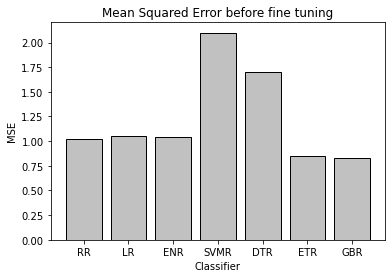

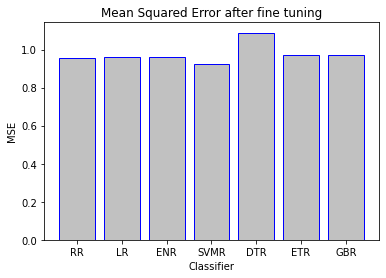

In [ ]:
# Mean Squared Error

import matplotlib.pyplot as plt 

mse_score = ()

estimators = ('RR','LR','ENR','SVMR','DTR','ETR','GBR')

plt.bar(estimators , mse_score1,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='black')

plt.ylabel('MSE')

plt.xlabel('Classifier')

plt.title('Mean Squared Error before fine tuning')

plt.show()

mse_score = (rr_mse, lr_mse, enr_mse, svmr_mse, dtr_mse, etr_mse_resampled,gbr_mse)

plt.bar(estimators , mse_score, color = (0.6, 0.6, 0.6, 0.6),  edgecolor='blue')

plt.ylabel('MSE')

plt.xlabel('Classifier')

plt.title('Mean Squared Error after fine tuning')

plt.show()

In general, we observe that after fine tuning some of the results regarding the mean squared error metric improved. Specifically for the regressors selected:

**Ridge Regressor**: Initially, we noticed an error value: 1.02 and finally reached out 0.95

**Lasso Regressor**: Initially, we noticed an error value: 1.05 and finally reached out 0.95

**Elastic Net Regressor** : Initially, we noticed an error value: 1.04 and finally reached out 0.95

**Support Vector Machine Regressor** : Initially, we noticed an error value: 2.09 and finally reached out 0.92

**Decision Tree Regressor** : Initially, we noticed an error value: 1.70 and finally reached out 1.08

**Extra Tree Regressor**: Initially, we noticed an error value: 0.84 and finally reached out 0.98

**Gradient Boosting Regressor** : Initially, we noticed an error value: 0.83 and finally reached out 0.97

## **R² or Coefficient of Determination**

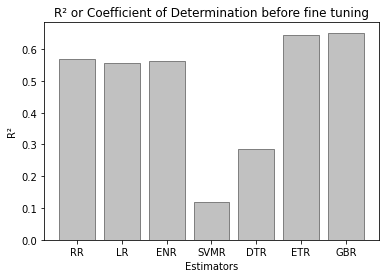

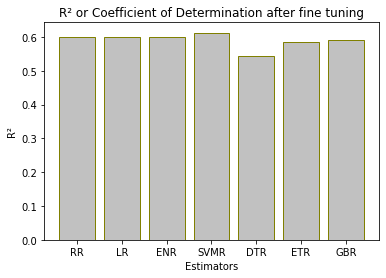

In [ ]:
# R²

import matplotlib.pyplot as plt 

r2_score=()

estimators = ('RR','LR','ENR','SVMR','DTR','ETR','GBR')

plt.bar(estimators, r2_score1,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='grey')

plt.ylabel('R²')

plt.xlabel('Estimators')

plt.title('R² or Coefficient of Determination before fine tuning')

plt.show()

r2_score = (rr_r2, lr_r2, enr_r2, svmr_r2, dtr_r2, etr_r2, gbr_r2)

plt.bar(estimators, r2_score,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='olive')

plt.ylabel('R²')

plt.xlabel('Estimators')

plt.title('R² or Coefficient of Determination after fine tuning')

plt.show()

In general, we observe that after fine tuning some of the results regarding the coefficient of determination metric improved. Specifically for the regressors selected:

**Ridge Regressor**: Initially, we noticed a value of the coefficient of determination: 0.56 and finally reached out 0.59

**Lasso Regressor**: Initially, we noticed a value of the coefficient of determination: 0.55 and finally reached out 0.59

**Elastic Net Regressor** : Initially, we noticed a value of the coefficient of determination: 0.56 and finally reached out 0.59

**Support Vector Machine Regressor** : Initially, we noticed a value of the coefficient of determination: 0.12 and finally reached out 0.61

**Decision Tree Regressor** : Initially, we noticed a value of the coefficient of determination: 0.28 and finally reached out 0.54

**Extra Tree Regressor**: Initially, we noticed a value of the coefficient of determination: 0.64 and finally reached out 0.58

**Gradient Boosting Regressor** : Initially, we noticed a value of the coefficient of determination: 0.65 and finally reached out 0.59

## **Median Absolute Error**

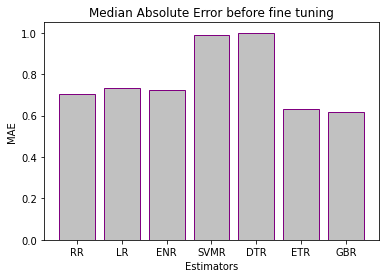

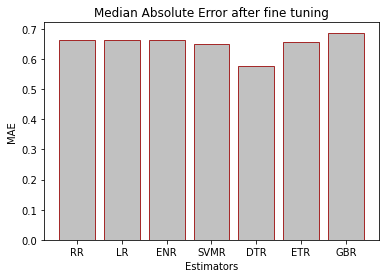

In [ ]:
# Median Absolut Error

import matplotlib.pyplot as plt 

mae_score=()

estimators = ('RR','LR','ENR','SVMR','DTR','ETR','GBR')

plt.bar(estimators, mae_score1,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='purple')

plt.ylabel('MAE')

plt.xlabel('Estimators')

plt.title('Median Absolute Error before fine tuning')

plt.show()

mae_score = (rr_mae, lr_mae, enr_mae, svmr_mae, dtr_mae, etr_mae,gbr_mae)

plt.bar(estimators, mae_score,color=(0.6, 0.6, 0.6, 0.6),  edgecolor='brown')

plt.ylabel('MAE')

plt.xlabel('Estimators')

plt.title('Median Absolute Error after fine tuning')

plt.show()

In general, we observe that after fine tuning some of the results regarding the median absolute error metric improved. Specifically for the regressors selected:

**Ridge Regressor**: Initially, we noticed an error value: 0.70 and finally reached out 0.66

**Lasso Regressor**: Initially, we noticed an error value: 0.73 and finally reached out 0.66

**Elastic Net Regressor** : Initially, we noticed an error value: 0.72 and finally reached out 0.66

**Support Vector Machine Regressor** : Initially, we noticed an error value: 0.99 and finally reached out 0.64

**Decision Tree Regressor** : Initially, we noticed an error value: 1.00 and finally reached out 0.78

**Extra Tree Regressor**: Initially, we noticed an error value: 0.62 and finally reached out 0.65

**Gradient Boosting Regressor** : Initially, we noticed an error value: 0.61 and finally reached out 0.68

# **Aggregated Results for Accuracy Metrics**

## **Aggregated Results for Mean Squared Error**

In [ ]:
MSE_Final=pd.DataFrame()

Estimators=pd.DataFrame(estimators)

MSE_before=pd.DataFrame(mse_score1)

MSE_after=pd.DataFrame(mse_score)

diff=(MSE_before-MSE_after)*100

final_mse=pd.concat([Estimators,MSE_before,MSE_after,diff], axis=1)

final_mse.columns=['Estimators','Before','After','Diff%']

final_mse.set_index('Estimators', inplace=True)

print(final_mse)

              Before     After       Diff%
Estimators                                
RR          1.026439  0.957923    6.851680
LR          1.056355  0.958992    9.736294
ENR         1.046898  0.958387    8.851135
SVMR        2.099303  0.924617  117.468610
DTR         1.705620  1.088364   61.725596
ETR         0.848756  0.972567  -12.381069
GBR         0.831036  0.973376  -14.233963


## **Aggregated Results for R²**

In [ ]:
R2_Final=pd.DataFrame()

Estimators=pd.DataFrame(estimators)

R2_before=pd.DataFrame(r2_score1)

R2_after=pd.DataFrame(r2_score)

diff=(R2_after-R2_before)*100

final_r2=pd.concat([Estimators,R2_before,R2_after,diff], axis=1)

final_r2.columns=['Estimators','Before','After','Diff%']

final_r2.set_index('Estimators', inplace=True)

print(final_r2)

              Before     After      Diff%
Estimators                               
RR          0.569873  0.598587   2.871359
LR          0.557337  0.598407   4.107023
ENR         0.561300  0.598387   3.708670
SVMR        0.120292  0.612542  49.224915
DTR         0.285264  0.543924  25.865950
ETR         0.644331  0.586245  -5.808567
GBR         0.651757  0.591969  -5.978769


## **Aggregated Results for Median Absolute Error**

In [ ]:
MAE_Final=pd.DataFrame()

Estimators=pd.DataFrame(estimators)

MAE_before=pd.DataFrame(mae_score1)

MAE_after=pd.DataFrame(mae_score)

diff=(MAE_before-MAE_after)*100

final_mae=pd.concat([Estimators,MAE_before,MAE_after,diff], axis=1)

final_mae.columns=['Estimators','Before','After','Diff%']

final_mae.set_index('Estimators', inplace=True)

print(final_mae)

              Before     After      Diff%
Estimators                               
RR          0.702384  0.663160   3.922373
LR          0.731287  0.662573   6.871429
ENR         0.724812  0.663037   6.177483
SVMR        0.990087  0.649420  34.066646
DTR         1.000000  0.577320  42.268041
ETR         0.630000  0.656250  -2.625000
GBR         0.615590  0.687129  -7.153925


# **Aggregated Results for Time**

## **Before Fine Tuning**

In [ ]:
times_train_before=pd.DataFrame([times_train_bef])
times_test_before=pd.DataFrame([times_test_bef])

times_test_before=times_test_before.T
times_train_before=times_train_before.T

final_times_before=pd.concat([times_train_before,times_test_before], axis=1)

final_times_before.columns=['Train','Test']

print(final_times_before)

         Train      Test
rr    0.027704  0.002372
lr    0.011295       NaN
enr   0.011649  0.009291
svmr  0.399435  0.103173
dtr   0.042075  0.001339
etr   0.937315  0.032886
gbr   1.268262  0.003593


## **After Fine Tuning**

In [ ]:
times_train_after=pd.DataFrame([times_train_aft])
times_test_after=pd.DataFrame([times_test_aft])

times_test_after=times_test_after.T
times_train_after=times_train_after.T

final_times_after=pd.concat([times_train_after,times_test_after], axis=1)

final_times_after.columns=['Train','Test']

print(final_times_after)

               Train      Test
rr_mse     21.192521  0.002562
rr_r2      24.294129  0.000947
rr_mae     24.258633  0.000648
lr_mse      4.914206  0.001888
lr_r2       9.186091  0.005193
lr_mae      6.421364  0.005085
enr_mse    59.760181  0.005063
enr_r2     68.803145  0.005202
enr_mae    68.426225  0.005415
svmr_mse  249.143061  0.143144
svmr_r2   249.152070  0.132995
svmr_mae  249.955203  0.135322
dtr_mse   371.350269  0.000945
dtr_mae   366.682742  0.000879
etr_mse   941.423298  0.014502
etr_mae   382.597790  0.014170
etr_r2    273.126702  0.014309
gbr_mse   429.928333  0.002630
gbr_r2    396.818951  0.003122
gbr_mae   656.018258  0.003772
dtr_r2    364.381106  0.000967


# **Conclusion**

## In conclusion, for the extra tree regressor and gradient boosting regressor we end up having worse results with preprocessing, in this case the main issue is that we didn't have the opportunity to try out all the parameters of this regressor in the gridsearch due to time period.